# Classification des documents du procès des groupes américains du tabac.

## Mélodie Boillet
### 22/12/2018

## 1. Stockage des fichiers texte et de leurs contenus dans des dictionnaires.

In [1]:
def get_data() -> (list, list, list):
    """
    Get the texts from the files.
    Iterate on all the directories. Then get all the file names in the current
    "dir_name" directory. Iterate on all the files of the current "dir_name"
    directory. Create a dictionary with the categories as keys and an array of the
    names of the text files as values. Create a dictionary with the categories
    as keys and an array of the contents of the text files as values.
    :return texts_names: The list of the texts names.
    :return texts_contents: The list of the texts contents.
    :return text_category_couples: The list of the texts contents and thei categories.
    """
    texts_names = dict()
    texts_contents = dict()
    text_category_couples = []
    # Iterate on all the directories.
    for dir_name in os.listdir("./data/Tobacco3482-OCR"):
        # Get all the file names in the current "dir_name" directory.
        file_names = os.listdir("./data/Tobacco3482-OCR/"+dir_name)
        names = []
        contents = []
        # Iterate on all the files of the current "dir_name" directory.
        for file_name in file_names:
            names.append(file_name)
            with open("./data/Tobacco3482-OCR/"+dir_name+"/"+file_name, 'r', encoding="utf8") as file:
                data = file.read()
                text_category_couples.append((data, dir_name))
                contents.append(data)
        # Create a dictionary with the categories as keys and an array of the names of the text files as values.
        texts_names[dir_name] = names
        # Create a dictionary with the categories as keys and an array of the contents of the text files as values.
        texts_contents[dir_name] = contents
    return texts_names, texts_contents, text_category_couples

## 2. Analyse des données.

In [2]:
def data_analysis(texts_names: list, texts_contents: list):
    """
    Do the analysis of the data.
    First compute the repartition of the texts by category.
    Then compute the mean number of letters in the texts by category.
    :param texts_names: The list of the texts names.
    :param texts_contents: The list of the texts contents.
    """
    _, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))

    ax1.bar(list(texts_names.keys()), [len(texts_names[category]) for category in texts_names.keys()])
    ax1.set_xlabel('Categorie')
    ax1.set_ylabel('Nombre de textes')
    ax1.set_title('Nombre de textes par categorie\n')

    mean_lengths = dict()
    for class_name in list(texts_names.keys()):
        sum_lengths = 0
        mean_length = 0
        for index, text in enumerate(texts_contents[class_name]):
            sum_lengths += len(text)
        mean_length = sum_lengths / (index + 1)
        mean_lengths[class_name] = mean_length

    ax2.bar(list(mean_lengths.keys()), list(mean_lengths.values()))
    ax2.set_xlabel('Categorie')
    ax2.set_ylabel('Nombre moyen de lettres')
    ax2.set_title('Nombre moyen de lettres par categorie\n')
    plt.show(block=False)

## 3. Pré-traitement des données.

In [3]:
def bow_vectors(train: list, dev: list, test: list) -> (list, list, list):
    """
    Create bag of word vectors from the data.
    :param train: The train data.
    :param dev: The dev data.
    :param test: The test data.
    :return X_train_counts: The vectors of the train data.
    :return X_dev_counts: The vectors of the dev data.
    :return X_test_counts: The vectors of the test data.
    """
    vectorizer = CountVectorizer(max_features=2000)
    vectorizer.fit(train)
    X_train_counts = vectorizer.transform(train)
    X_dev_counts = vectorizer.transform(dev)
    X_test_counts = vectorizer.transform(test)
    return X_train_counts, X_dev_counts, X_test_counts

In [4]:
def tfidf_vectors(train: list, dev: list, test: list) -> (list, list, list):
    """
    Create TF-IDF vectors from the data.
    :param train: The train data.
    :param dev: The dev data.
    :param test: The test data.
    :return X_train_tf: The vectors of the train data.
    :return X_dev_tf: The vectors of the dev data.
    :return X_test_tf: The vectors of the test data.
    """
    tf_transformer = TfidfTransformer().fit(train)
    X_train_tf = tf_transformer.transform(train)
    X_dev_tf = tf_transformer.transform(dev)
    X_test_tf = tf_transformer.transform(test)
    return X_train_tf, X_dev_tf, X_test_tf

## 4. Entrainement et test d'un classifieur Naive Bayes.

In [5]:
def train_test(x_train: list, x_dev: list, x_test: list,
               y_train: list, y_dev: list, y_test: list) -> (list, list, list):
    """
    Create tf-idf vectors from the data.
    :param x_train: The train data.
    :param x_dev: The dev data.
    :param x_test: The test data.
    :param y_train: The categories of the train data.
    :param y_dev: The categories of the dev data.
    :param y_test: The categories of the test data.
    :return train_predict: The vectors of the train data.
    :return dev_predict: The vectors of the dev data.
    :return test_predict: The vectors of the test data.
    """
    clf = MultinomialNB()
    clf.fit(x_train, y_train)
    train_predict = clf.predict(x_train)
    dev_predict = clf.predict(x_dev)
    test_predict = clf.predict(x_test)
    print('    Accuracy train set : {0:.2f} %'.format(len(train_predict[train_predict == y_train]) / len(y_train)*100))
    print('    Accuracy dev set : {0:.2f} %'.format(len(dev_predict[dev_predict == y_dev]) / len(y_dev)*100))
    print('    Accuracy test set : {0:.2f} %'.format(len(test_predict[test_predict == y_test]) / len(y_test)*100))
    return train_predict, dev_predict, test_predict

## 5. Analyse des erreurs.

In [6]:
# Classification report.
def error_analysis(categories: list, predict: list, names: str):
    """
    Compute the classification report for the train, dev or test data set.
    :param y: The categories of the data.
    :param X_dev: The predicted categories of the data.
    :param X_test: The name of the data set.
    """
    for index, category in enumerate(categories):
        print("\nScores per class "+names[index]+" :")
        print(classification_report(category, predict[index]))

## Programme principal.

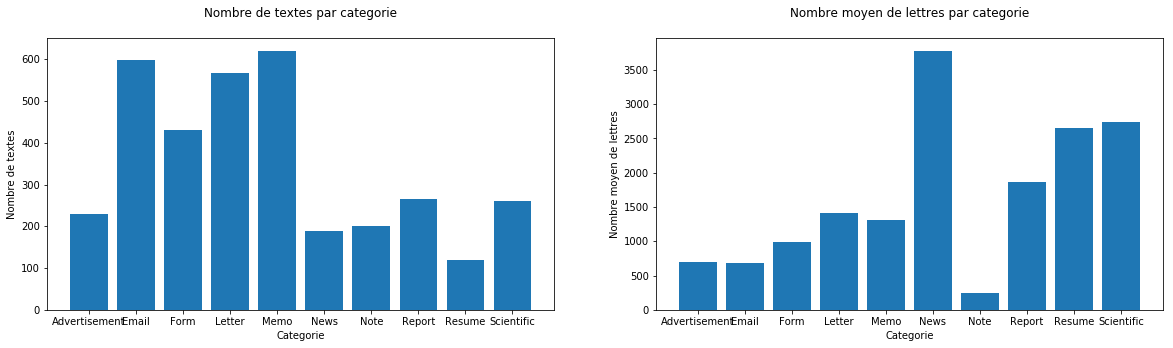

Train : 2088 = 59.97 %
Dev : 697 = 20.02 %
Test : 697 = 20.02 %

Bag-of-word representation :
    Accuracy train set : 82.52 %
    Accuracy dev set : 75.18 %
    Accuracy test set : 71.74 %

TF-IDF representation :
    Accuracy train set : 73.42 %
    Accuracy dev set : 66.43 %
    Accuracy test set : 61.55 %

Scores per class Train :
               precision    recall  f1-score   support

Advertisement       0.75      0.82      0.79       153
        Email       0.94      0.96      0.95       363
         Form       0.79      0.87      0.83       240
       Letter       0.86      0.78      0.82       350
         Memo       0.77      0.84      0.80       372
         News       0.71      0.78      0.74        96
         Note       0.79      0.53      0.63       118
       Report       0.76      0.78      0.77       165
       Resume       1.00      0.99      0.99        72
   Scientific       0.85      0.73      0.78       159

  avg / total       0.83      0.83      0.82      2088



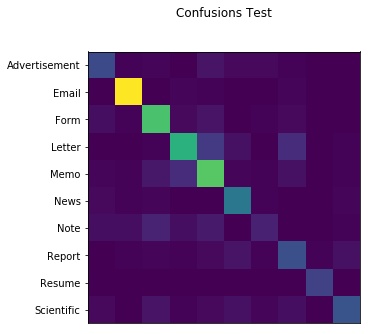

In [17]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix

TEXTS_NAMES, TEXTS_CONTENTS, TEXT_CATEGORY_COUPLES = get_data()
data_analysis(TEXTS_NAMES, TEXTS_CONTENTS)

# Split the data.
X, Y = zip(*TEXT_CATEGORY_COUPLES)
X_TRAIN, X_TEST, Y_TRAIN, Y_TEST = train_test_split(X, Y, test_size=0.20)
X_TRAIN, X_DEV, Y_TRAIN, Y_DEV = train_test_split(X_TRAIN, Y_TRAIN,
                                                  test_size=(0.20 / (0.60 + 0.20)))
print('Train : {0:0} = {1:.2f} %'.format(len(X_TRAIN), (len(X_TRAIN)/len(X)*100)))
print('Dev : {0:0} = {1:.2f} %'.format(len(X_DEV), (len(X_DEV)/len(X)*100)))
print('Test : {0:0} = {1:.2f} %'.format(len(X_TEST), (len(Y_TEST)/len(X)*100)))

# Compute the vectors.
X_TRAIN_COUNTS, X_DEV_COUNTS, X_TEST_COUNTS = bow_vectors(X_TRAIN, X_DEV, X_TEST)
X_TRAIN_TF, X_DEV_TF, X_TEST_TF = tfidf_vectors(X_TRAIN_COUNTS, X_DEV_COUNTS, X_TEST_COUNTS)

# Train and test.
# Bag of words representation.
print("\nBag-of-word representation :")
TRAIN_PREDICT, DEV_PREDICT, TEST_PREDICT = train_test(X_TRAIN_COUNTS, X_DEV_COUNTS,
                                                      X_TEST_COUNTS, Y_TRAIN, Y_DEV, Y_TEST)
BOW_RESULTS = [TRAIN_PREDICT, DEV_PREDICT, TEST_PREDICT]
# TF-IDF representation.
print("\nTF-IDF representation :")
TRAIN_PREDICT, DEV_PREDICT, TEST_PREDICT = train_test(X_TRAIN_TF, X_DEV_TF,
                                                      X_TEST_TF, Y_TRAIN, Y_DEV, Y_TEST)
TF_RESULTS = [TRAIN_PREDICT, DEV_PREDICT, TEST_PREDICT]

# Error analysis.
error_analysis([Y_TRAIN, Y_DEV, Y_TEST],
               [BOW_RESULTS[0], BOW_RESULTS[1], BOW_RESULTS[2]],
               ['Train', 'Dev', 'Test'])

_, AX1 = plt.subplots(1, 1, figsize=(5, 5))
AX1.set_title("Confusions Test\n")
AX1.matshow(confusion_matrix(Y_TEST, BOW_RESULTS[2]))
AX1.set_yticks(range(len(np.unique(Y))))
AX1.set_yticklabels(np.unique(Y))
AX1.set_xticks([])
#AX2.set_title("Confusions Dev\n")
#AX2.matshow(confusion_matrix(Y_DEV, BOW_RESULTS[1]))
#AX2.set_yticks([])
#AX2.set_xticks([])
#AX3.set_title("Confusions Test\n")
#AX3.matshow(confusion_matrix(Y_TEST, BOW_RESULTS[2]))
#AX3.set_yticks([])
#AX3.set_xticks([])
plt.show(block=True)